In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('\workspace\coffee analysis\merged_data_cleaned.csv')
# 1.altitude_mean_meters
# 2.Species
# 3.Processing.Method
# 4.Region
# 5.Total.Cup.Points
df.dropna(subset = ["altitude_mean_meters"], inplace=True)
df['Country.of.Origin'][df['Country.of.Origin'].isna()] = 'Unknown'



C:\Users\auto\AppData\Local\Temp\ipykernel_16312\1636400181.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country.of.Origin'][df['Country.of.Origin'].isna()] = 'Unknown'


In [7]:
df.describe()

,Unnamed: 0,altitude_mean_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1105.000000,1106.000000
mean,669.899638,1328.013123,7.578002,7.527604,7.401311,7.535714,7.513382,7.512559,9.876555,9.860072,9.882450,7.495678,82.183580,0.091980,0.367993,0.139367,3.528933
std,381.077935,486.487007,0.308928,0.330967,0.339747,0.312954,0.289186,0.353711,0.429018,0.725699,0.523281,0.413252,2.627747,0.045533,1.850823,0.725155,5.262999
min,0.000000,1.000000,5.080000,6.170000,6.170000,5.250000,5.170000,5.250000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000
25%,340.250000,1100.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.100000,0.000000,0.000000,0.000000
50%,674.500000,1310.640000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000
75%,991.750000,1600.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000
max,1336.000000,4287.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000


Mean ของความสูงที่ใช้ปลูกกาแฟ = 1775.030545	เมตร
Mean ของคะแนนเฉลี่ย = 82.109594	คะแนน

C:\Users\auto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\auto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height')

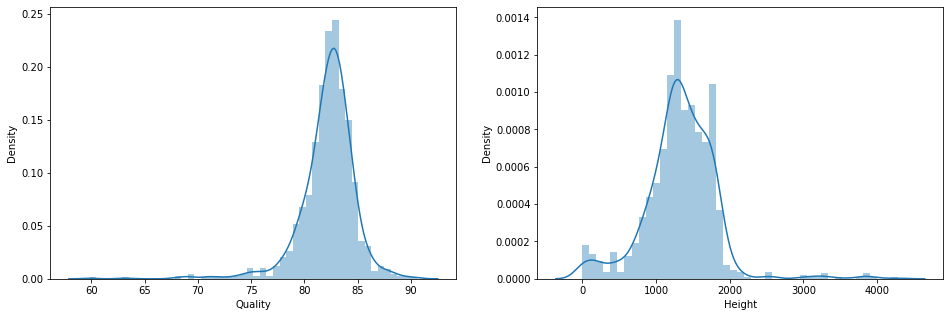

In [8]:
altitude_series = df.loc[:,'altitude_mean_meters']
point = df.loc[:,'Total.Cup.Points']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(a=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.distplot(a=altitude_series)
plt.xlabel("Height")

จะเห็นได้ว่ากราฟ distribution ยังมี Outlier ที่เยอะมากอยู่ จึงต้องลบทิ้ง

In [9]:
print("Highest height allowed",altitude_series.mean() + 3*altitude_series.std())
print("Lowest height allowed",altitude_series.mean() - 3*altitude_series.std())

print("Highest Quality allowed",point.mean() + 3*point.std())
print("Lowest Quality allowed",point.mean() - 3*point.std())

Highest height allowed 2787.474144089573
Lowest height allowed -131.447897434962
Highest Quality allowed 90.06682065614615
Lowest Quality allowed 74.30034028417936


นี่คือขอบเขตข้อมูลของความสูง ถ้ามากกว่า 2787.474144089573 จะถือว่าเป็น outliers

Find Outliers

In [10]:
df[(altitude_series> 2787.474144089573) | (altitude_series < -131.447897434962)]

,Unnamed: 0,Species,Country.of.Origin,Altitude,altitude_mean_meters,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
215,215,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.58,7.83,7.58,7.83,...,7.67,10.00,10.0,10.00,7.83,84.17,0.10,0,0.0,2
627,628,Arabica,Colombia,1800 meters (5900,3850.0,NaN,7.33,7.58,7.42,7.42,...,7.67,10.00,10.0,10.00,7.58,82.67,0.11,0,0.0,0
836,837,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.58,7.50,7.33,7.42,...,7.25,10.00,10.0,10.00,7.17,81.83,0.10,2,0.0,6
839,840,Arabica,Myanmar,4001,4001.0,Washed / Wet,7.33,7.58,7.50,7.42,...,7.33,10.00,10.0,10.00,7.33,81.83,0.00,0,0.0,2
999,1001,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.42,7.25,7.17,7.50,...,7.17,10.00,10.0,10.00,7.25,81.00,0.09,0,0.0,8
1036,1038,Arabica,Myanmar,3825,3825.0,Washed / Wet,6.92,7.50,7.00,7.58,...,7.08,10.00,10.0,10.00,7.17,80.75,0.00,0,0.0,2
1071,1073,Arabica,Myanmar,3800,3800.0,Washed / Wet,7.17,7.33,7.17,7.42,...,7.08,10.00,10.0,10.00,7.08,80.50,0.00,0,0.0,2
1096,1098,Arabica,Myanmar,4287,4287.0,Natural / Dry,7.42,7.00,7.08,7.00,...,7.33,10.00,10.0,10.00,7.25,80.25,0.00,0,0.0,1
1121,1123,Arabica,Myanmar,3845,3845.0,Washed / Wet,7.17,7.33,7.00,7.42,...,7.00,10.00,10.0,10.00,6.92,80.00,0.00,0,0.0,4
1267,1269,Arabica,Indonesia,3500,3500.0,Natural / Dry,7.33,7.00,6.50,6.08,...,6.33,9.33,10.0,9.33,6.67,76.17,0.12,4,0.0,26


สร้างชุดข้อมูลที่กำจัด Outliers ออกไปแล้ว

In [11]:
new_df = df[(altitude_series < 2787.474144089573) & (altitude_series > -131.447897434962)
            & (point < 90.09512695261628) & (point > 74.29642982394051)]



C:\Users\auto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\auto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height')

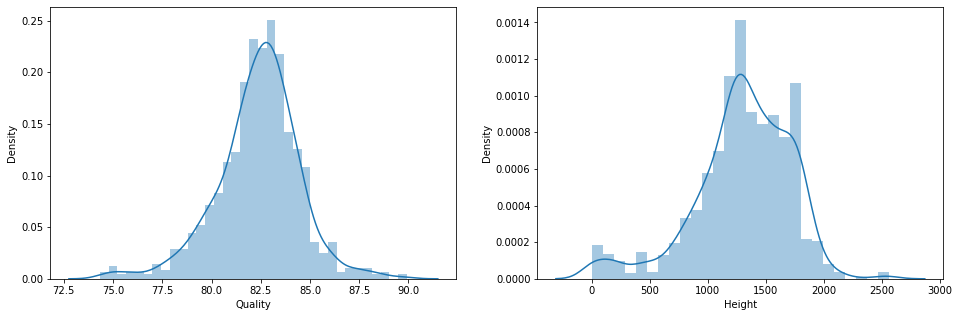

In [12]:
altitude_series = new_df.loc[:,'altitude_mean_meters']
point = new_df.loc[:,'Total.Cup.Points']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(a=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.distplot(a=altitude_series)
plt.xlabel("Height")

Boxplot ของ Quality และ Height

Text(0.5, 0, 'Height')

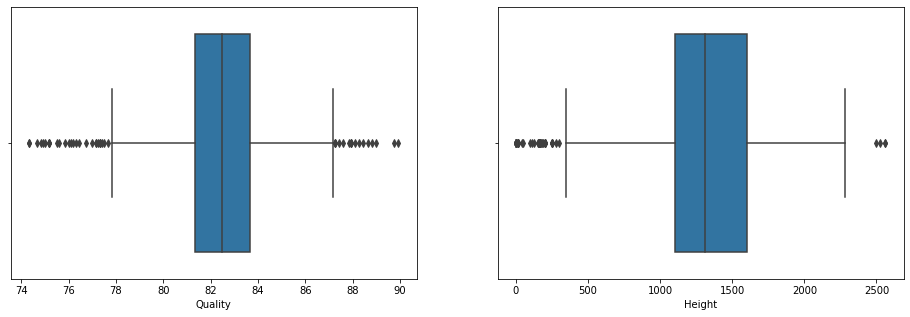

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.boxplot(x=altitude_series)
plt.xlabel("Height")

ทำ Scatter plot หาความสัมพันธ์ระหว่าง Quality กับ height

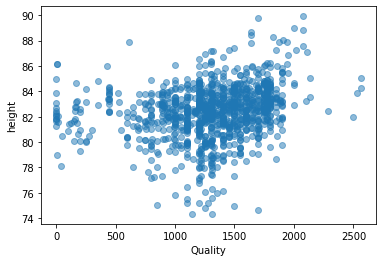

In [14]:
plt.scatter(altitude_series, point, alpha=0.5)
plt.xlabel("Quality")
plt.ylabel("height")
plt.show()

C:\Users\auto\AppData\Local\Temp\ipykernel_16312\1052803582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country']= new_df.loc[:,'Country.of.Origin']


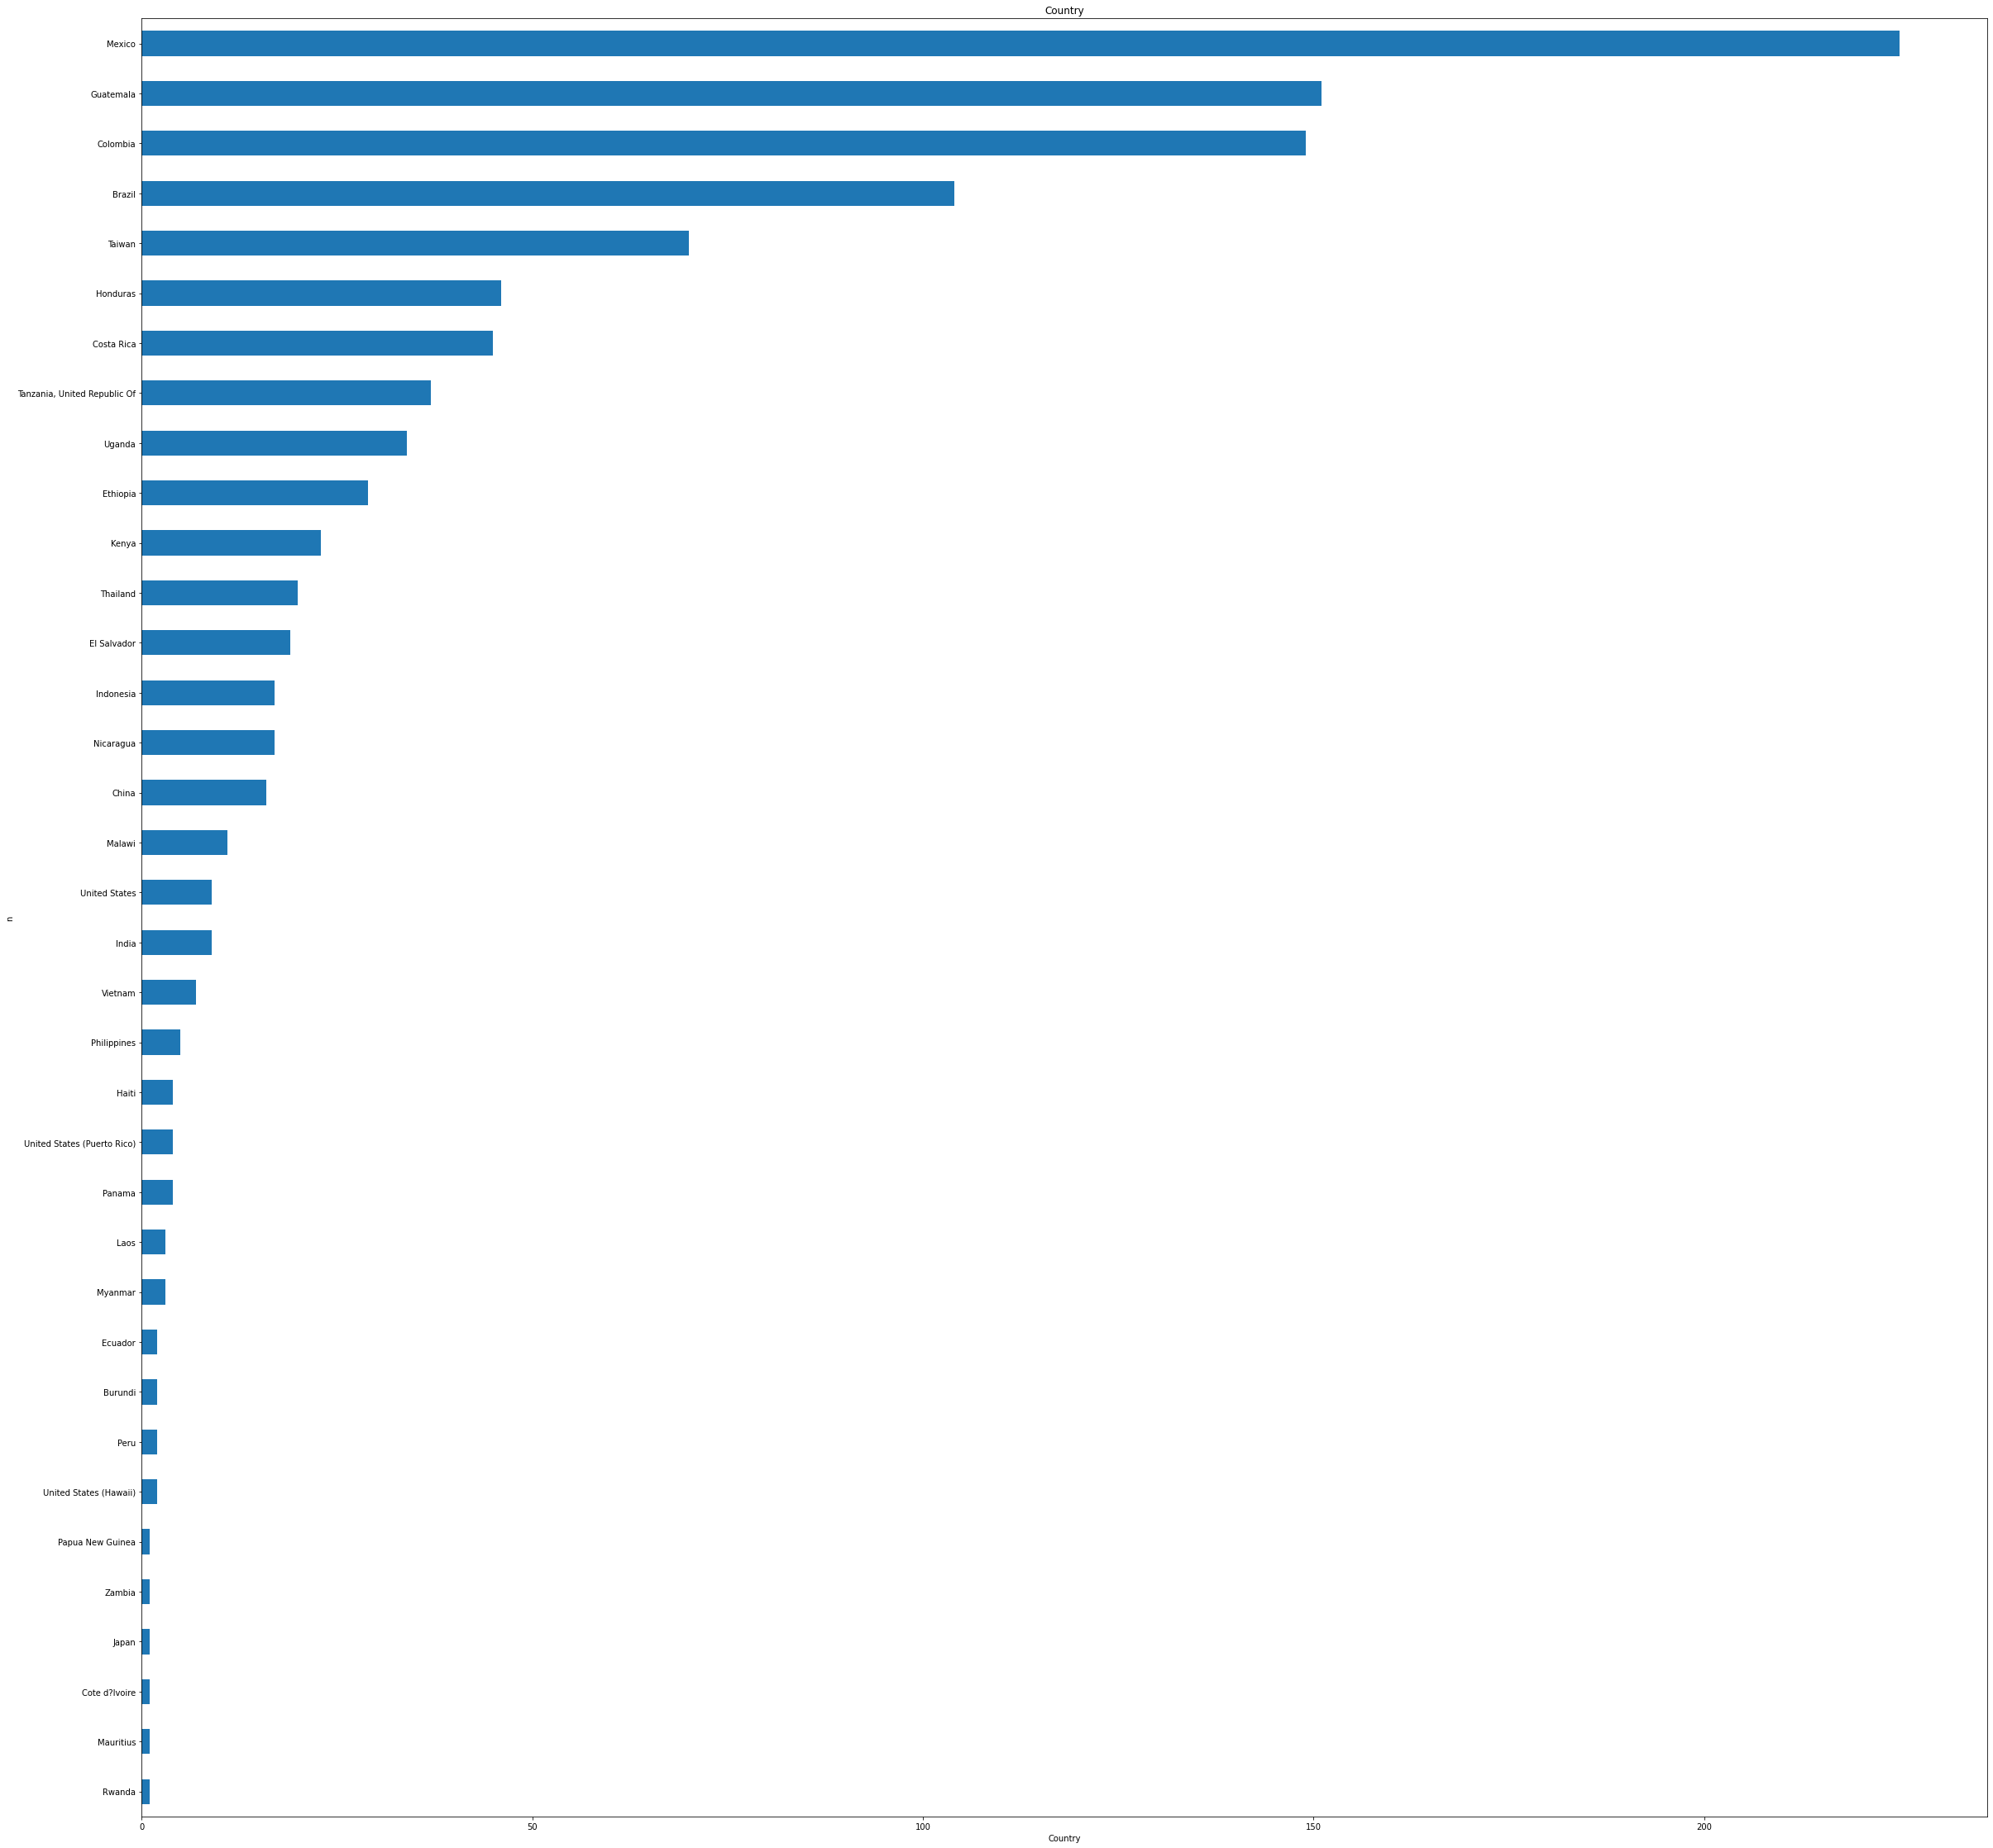

In [36]:
new_df['country']= new_df.loc[:,'Country.of.Origin']
plt.figure(figsize=(40,40))
new_df.country.value_counts().sort_values().plot(kind = 'barh')
plt.xlabel("Country")
plt.ylabel("n")
plt.title("Country")
plt.show()

C:\Users\auto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

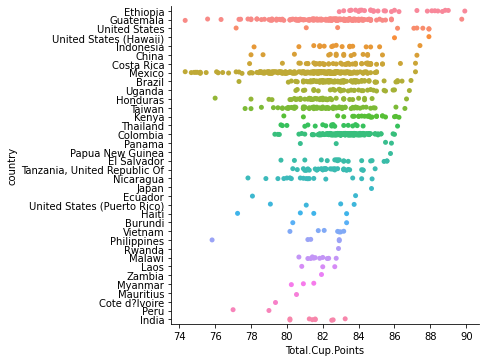

In [37]:
sns.catplot(point,new_df['country'],data=new_df)
plt.show()